Nmae: Shreeya Lama

Section:L6CG19

WORKSHEET-5

#Implement an End to End CNN Model for Image Classification Task.

#Task 1: Data Understanding and Visualization:

**1. Load and visualize images**

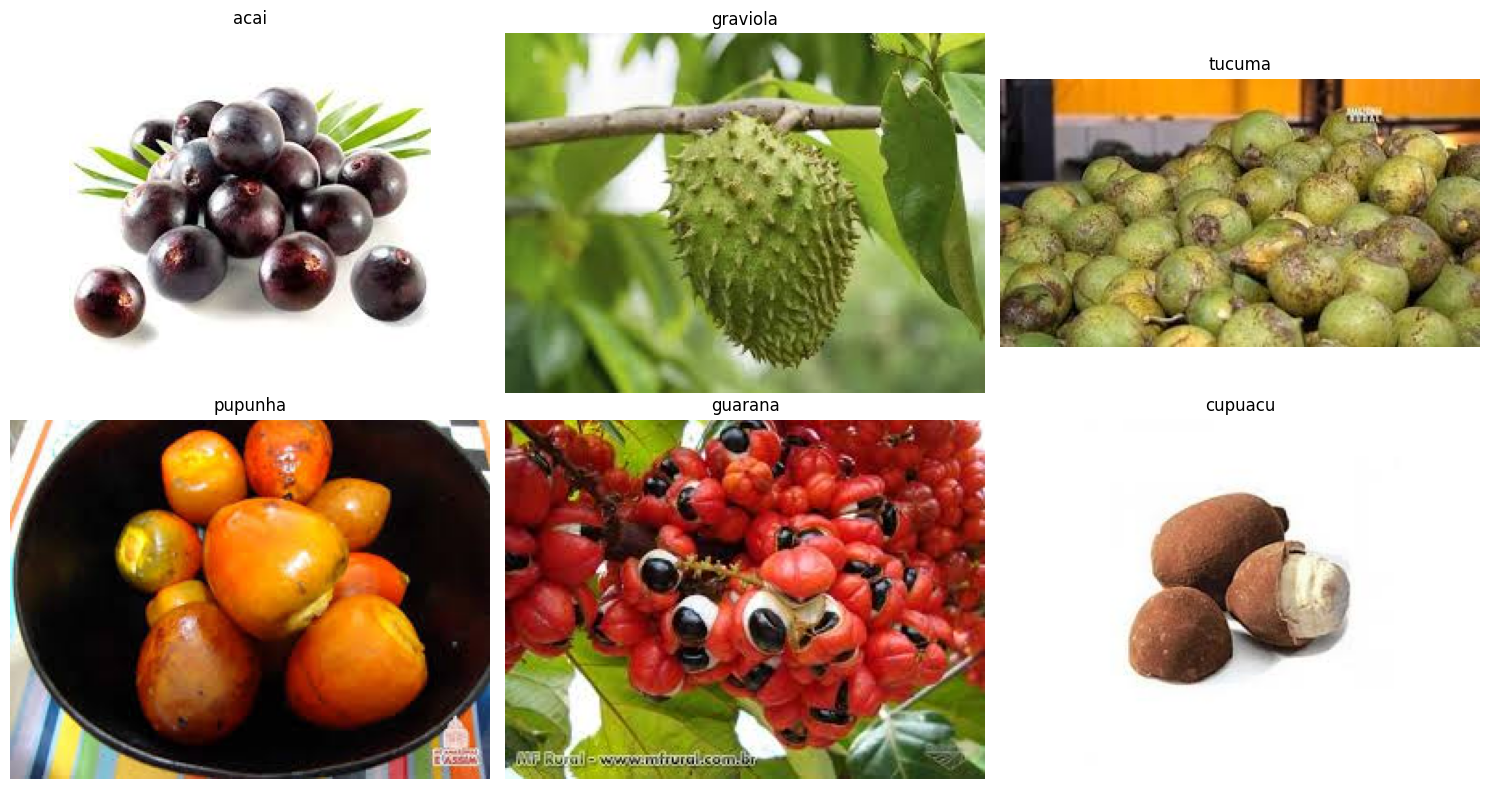

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

train_dir = '/content/drive/MyDrive/Artificial Intelligence and Machine Learning/FruitinAmazon/FruitinAmazon/train'
test_dir = '/content/drive/MyDrive/Artificial Intelligence and Machine Learning/FruitinAmazon/FruitinAmazon/test'

# Get the list of class directories
class_dirs = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Function to load and display images
def visualize_images(class_dirs, num_images_per_class=1):
    fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize=(15, 8))
    axes = axes.flatten()

    for i, class_dir in enumerate(class_dirs):
        # Get all image files in the class directory
        image_files = [f for f in os.listdir(class_dir) if f.endswith(('png', 'jpg', 'jpeg'))]
        # Randomly select an image
        selected_image = random.choice(image_files)
        image_path = os.path.join(class_dir, selected_image)

        # Open and display the image
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].set_title(os.path.basename(class_dir))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
visualize_images(class_dirs)

**What did you observe?**

The dataset contains diverse fruit classes, each with unique colors, textures, and shapes. Images are well-lit and organized in a grid. Potential challenges include class imbalance and variability. Preprocessing and data augmentation can improve model performance.

**2. Check for Corrupted Image**

In [ ]:
def check_corrupted_images(directory):
    corrupted_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path)
                    img.verify()  # Verify that it is, in fact, an image
                except (IOError, SyntaxError) as e:
                    print(f"Removed corrupted image: {file_path}")
                    corrupted_images.append(file_path)
                    os.remove(file_path)
    if not corrupted_images:
        print("No corrupted images found.")

check_corrupted_images(train_dir)
check_corrupted_images(test_dir)

No corrupted images found.
No corrupted images found.


#Task 2: Loading and Preprocessing Image Data in keras:

In [ ]:
import tensorflow as tf

# Define image size and batch size
img_height, img_width = 128, 128
batch_size = 16
validation_split = 0.2

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load and preprocess test data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    seed=123
)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 30 files belonging to 6 classes.


In [ ]:
for class_dir in class_dirs:
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('png', 'jpg', 'jpeg'))]
    if len(image_files) == 0:
        print(f"Empty directory: {class_dir}")

#Task 3 - Implement a CNN with

In [ ]:
import tensorflow as tf

num_classes = len(os.listdir(train_dir))

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,222 (16.07 MB)

 Trainable params: 4,213,222 (16.07 MB)

 Non-trainable params: 0 (0.00 B)

#Task 4: Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Task 5: Train the Model

In [ ]:
import tensorflow as tf

checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(
    train_ds,
    epochs=250,
    validation_data=test_ds,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.1580 - loss: 2.5326
Epoch 1: val_loss improved from inf to 2.18633, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 462ms/step - accuracy: 0.1617 - loss: 2.5347 - val_accuracy: 0.1667 - val_loss: 2.1863
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.2698 - loss: 1.9176
Epoch 2: val_loss improved from 2.18633 to 1.64232, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - accuracy: 0.2873 - loss: 1.8919 - val_accuracy: 0.2333 - val_loss: 1.6423
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.3118 - loss: 1.5370
Epoch 3: val_loss improved from 1.64232 to 1.40684, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 374ms/step - accuracy: 0.3200 - loss: 1.5245 - val_accuracy: 0.3333 - val_loss: 1.4068
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.4892 - loss: 1.2065
Epoch 4: val_loss improved from 1.40684 to 1.39979, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step - accuracy: 0.4864 - loss: 1.2104 - val_accuracy: 0.4000 - val_loss: 1.3998
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.7156 - loss: 0.9106
Epoch 5: val_loss improved from 1.39979 to 1.21661, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 0.7283 - loss: 0.9061 - val_accuracy: 0.5333 - val_loss: 1.2166
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8962 - loss: 0.6222
Epoch 6: val_loss did not improve from 1.21661
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 553ms/step - accuracy: 0.8973 - loss: 0.6146 - val_accuracy: 0.4333 - val_loss: 2.0036
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8726 - loss: 0.4056
Epoch 7: val_loss improved from 1.21661 to 0.99285, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - accuracy: 0.8683 - loss: 0.4155 - val_accuracy: 0.6333 - val_loss: 0.9929
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.9538 - loss: 0.2384
Epoch 8: val_loss did not improve from 0.99285
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.9499 - loss: 0.2445 - val_accuracy: 0.6333 - val_loss: 1.3111
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 1.0000 - loss: 0.1032
Epoch 9: val_loss improved from 0.99285 to 0.92013, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 1.0000 - loss: 0.1050 - val_accuracy: 0.7000 - val_loss: 0.9201
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 1.0000 - loss: 0.0604
Epoch 10: val_loss did not improve from 0.92013
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 1.0000 - loss: 0.0606 - val_accuracy: 0.6333 - val_loss: 1.0845
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 1.0000 - loss: 0.0340
Epoch 11: val_loss did not improve from 0.92013
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 550ms/step - accuracy: 1.0000 - loss: 0.0341 - val_accuracy: 0.6333 - val_loss: 1.4365
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 1.0000 - loss: 0.0316
Epoch 12: val_loss did not improve from 0.92013
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step - accuracy: 1.0000 - loss: 0.0298 - val_accuracy: 0.6667 - val_loss: 1.1399
Epoch 13/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 1.0000 - loss: 0.0101
Epoch 13: val_loss did not improve from 0.92013
5/5 

#Task 6: Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7583 - loss: 0.7865
Test accuracy: 0.7000


#Task 7: Save and Load the Model

In [ ]:
# Save the model
model.save("final_model.h5")

# Load the saved model
loaded_model = tf.keras.models.load_model("final_model.h5")

# Re-evaluate the loaded model
test_loss_loaded, test_acc_loaded = loaded_model.evaluate(test_ds)
print(f"Loaded Model Test accuracy: {test_acc_loaded:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7583 - loss: 0.7865
Loaded Model Test accuracy: 0.7000


#Task 8: Predictions and Classification Report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_prob = loaded_model.predict(test_ds)
y_pred = np.argmax(y_pred_prob, axis=1)

class_names = os.listdir(train_dir)
print(classification_report(y_true, y_pred, target_names=class_names))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
              precision    recall  f1-score   support

        acai       0.67      0.80      0.73         5
    graviola       0.45      1.00      0.62         5
      tucuma       1.00      0.80      0.89         5
     pupunha       0.75      0.60      0.67         5
     guarana       1.00      0.60      0.75         5
     cupuacu       1.00      0.40      0.57         5

    accuracy                           0.70        30
   macro avg       0.81      0.70      0.70        30
weighted avg       0.81      0.70      0.70        30



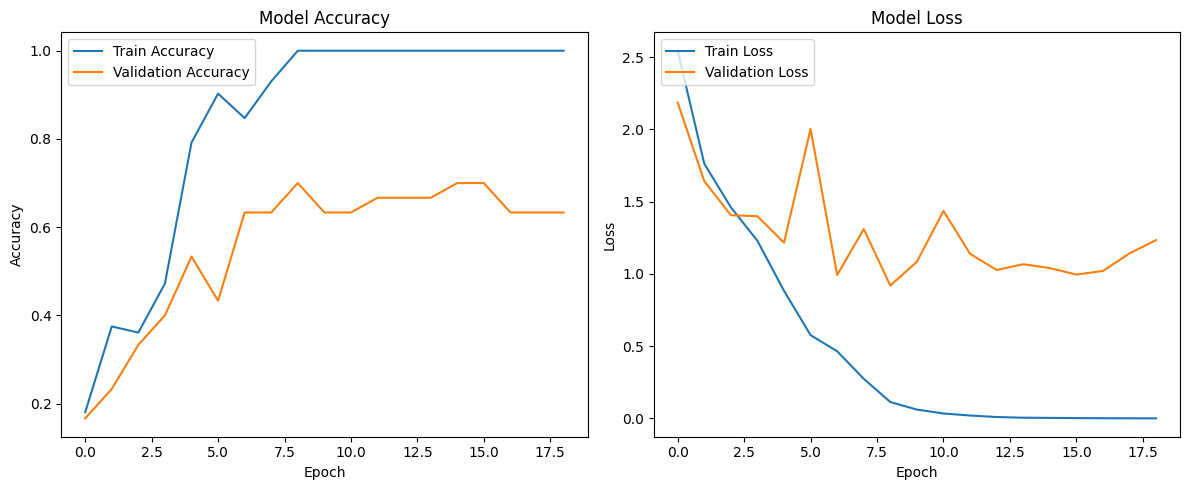

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to visualize training history
plot_training_history(history)

**Save the Model**

In [ ]:
# Save the final trained model
model.save("/content/final_model.h5")

# Load the saved model
loaded_model = tf.keras.models.load_model("/content/final_model.h5")

# Re-evaluate the loaded model on the test dataset
test_loss_loaded, test_acc_loaded = loaded_model.evaluate(test_ds)
print(f"Loaded Model Test Accuracy: {test_acc_loaded:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.7583 - loss: 0.7865
Loaded Model Test Accuracy: 0.7000
